In [62]:
import pdb

import numpy as np
import scipy.optimize as op
import scipy.special as sec
from scipy import stats
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import astropy
from astropy import stats as astrostats
import radvel
%matplotlib inline

# Assuming a polished list of known planets and candidates in the legacy sample, explore and visualize properties such as mass, host star metallicity, etc.

In [24]:
data = pd.read_csv('legacy_tables/system_props_719.csv')

In [25]:
specmatch = pd.read_csv('/Users/lee/Academics/Astronomy/Planets/legacy_analysis/legacy_tables/legacy_specmatch_medians.csv')

In [26]:
len(specmatch)

745

In [27]:
masses_only = pd.read_csv('legacy_tables/planet_list_719.csv')

## Filter out the 'N's to see if I cut out any Super-Earths by accident.

In [28]:
masses_out = masses_only.loc[masses_only.status == 'N'].reset_index(drop=True)

In [7]:
masses_out_earth = masses_out.loc[masses_out.mass <= 1].reset_index(drop=True)
masses_out_earth = masses_out_earth.loc[masses_out_earth.per <= 10**4].reset_index(drop=True)

## Sort the planets into real, new candidates, known.

In [29]:
#masses_real = masses_real.loc[masses_real.status != 'B'].reset_index(drop=True)

masses_real = masses_only.query('status != "N" and status != "A"').reset_index(drop=True)
masses_good = masses_real.query('mass != "nan"').reset_index(drop=True)#[masses_only.hostname != 'hip63510']
masses_old  = masses_good.query('status == "K"').reset_index(drop=True)
masses_new  = masses_good.query('status == "C" or status == "J"').reset_index(drop=True)

In [30]:
print(len(masses_old), len(masses_new))

159 23


In [21]:
masses_real.query('hostname == "52265"')[['hostname', 'mass', 'mass_med', 'mass_minus',
                                          'mass_plus', 'axis', 'axis_med', 'axis_minus', 
                                          'axis_plus', 'per', 'per_med', 'per_minus', 
                                          'per_plus', 'e', 'e_med', 'e_minus', 
                                          'e_plus']]

,hostname,mass,mass_med,mass_minus,mass_plus,axis,axis_med,axis_minus,axis_plus,per,per_med,per_minus,per_plus,e,e_med,e_minus,e_plus
151,52265,1.126337,1.125737,1.072949,1.178224,0.510097,0.510091,0.498670,0.521054,119.267437,119.262847,119.249774,119.275628,0.212644,0.213475,0.199719,0.227009
152,52265,0.336427,0.334477,0.281332,0.409382,2.612116,2.614890,2.552481,2.676157,1382.075245,1382.145269,1367.389557,1405.166780,0.657137,0.571402,0.455728,0.684923


In [27]:
masses_new.sort_values('hostname')

,Unnamed: 0,hostname,status,mass,mass_med,mass_minus,mass_plus,axis,axis_med,axis_minus,...,per_minus,per_plus,k,k_med,k_minus,k_plus,e,e_med,e_minus,e_plus
1,22,111031,C,12.056604,32.914010,17.629905,57.284030,12.811619,24.715374,17.297921,...,24594.650355,66414.425194,90.729560,180.432225,110.876447,295.780887,0.163842,0.326113,0.154414,0.465122
2,49,136925,C,0.945799,1.005890,0.823408,1.656874,4.980120,5.307153,5.013891,...,4419.452355,5183.052633,18.456355,14.974557,11.428199,35.176019,0.712327,0.389060,0.093276,0.768442
3,52,141004,C,0.044406,0.043573,0.038741,0.048470,0.123548,0.123558,0.120797,...,15.506104,15.509657,3.575406,3.527288,3.153422,3.896214,0.187523,0.170833,0.066116,0.279786
0,1,145675,C,5.930104,6.186677,5.341438,7.168676,15.947416,17.505125,13.998808,...,19175.274377,40530.007386,46.782006,47.576763,43.540532,52.143361,0.427951,0.465702,0.362407,0.574290
4,68,156668,C,0.099188,0.096316,0.087852,0.104975,1.559897,1.560475,1.539494,...,806.987064,816.860605,2.608918,2.528189,2.311370,2.751140,0.161054,0.115431,0.038650,0.206340
5,78,161797,C,0.033408,0.032212,0.026375,0.038330,0.290082,0.290007,0.282042,...,52.349562,52.445064,1.636319,1.626837,1.341842,1.925891,0.140784,0.172558,0.051706,0.369922
6,81,164922,C,0.034803,0.033749,0.030469,0.037038,0.229434,0.229438,0.226372,...,41.748747,41.773118,2.167503,2.104247,1.904826,2.302513,0.129948,0.097173,0.029314,0.188822
7,82,164922,C,0.015228,0.014572,0.012372,0.016789,0.102439,0.102435,0.101067,...,12.455752,12.460122,1.433398,1.391642,1.179177,1.624007,0.190084,0.184009,0.055797,0.375051
8,86,168009,C,0.033017,0.032481,0.028924,0.036136,0.119143,0.119141,0.116973,...,15.144790,15.150667,2.801546,2.747435,2.458445,3.044453,0.204126,0.137987,0.044799,0.256687
9,111,190360,C,0.029927,0.028929,0.024988,0.032861,0.393159,0.393153,0.385167,...,88.573991,88.792994,1.359634,1.326501,1.148409,1.501698,0.183084,0.164210,0.050874,0.304093


In [12]:
masses_good.query('per > 2*10**4')

,Unnamed: 0,hostname,mass,a,per,e,status
28,64,34721,1.311420,20.954098,34547.53489,0.370596,C
84,167,145675,6.182651,16.287629,24043.75217,0.440123,C
93,188,168443,7.570051,16.446298,23702.32991,0.284218,C
140,277,149806,4.622411,14.407135,20483.40127,0.306224,C
164,336,32923,2.264484,15.722908,23496.03713,0.141967,C
184,365,95128,1.349735,18.034964,27574.80370,0.618362,K


In [32]:
mass = masses_good.mass
mold = masses_old.mass
aold = masses_old.axis
a    = masses_good.axis
perold = masses_old.per
per    = masses_good.per

## Look at all good Super-Earth candidates.

In [33]:
super_earths = masses_new.query('axis < 5 and mass < 1')

In [34]:
print(len(super_earths))
super_earths.sort_values('per')

17


,Unnamed: 0,hostname,status,mass,mass_med,mass_minus,mass_plus,axis,axis_med,axis_minus,...,per_minus,per_plus,k,k_med,k_minus,k_plus,e,e_med,e_minus,e_plus
7,82,164922,C,0.015228,0.014572,0.012372,0.016789,0.102439,0.102435,0.101067,...,12.455752,12.460122,1.433398,1.391642,1.179177,1.624007,0.190084,0.184009,0.055797,0.375051
8,86,168009,C,0.033017,0.032481,0.028924,0.036136,0.119143,0.119141,0.116973,...,15.144790,15.150667,2.801546,2.747435,2.458445,3.044453,0.204126,0.137987,0.044799,0.256687
3,52,141004,C,0.044406,0.043573,0.038741,0.048470,0.123548,0.123558,0.120797,...,15.506104,15.509657,3.575406,3.527288,3.153422,3.896214,0.187523,0.170833,0.066116,0.279786
18,227,86728,C,0.033711,0.031148,0.025889,0.036316,0.200356,0.200367,0.195990,...,31.125167,31.158393,2.134348,1.950412,1.625233,2.285778,0.300708,0.196816,0.063407,0.375291
6,81,164922,C,0.034803,0.033749,0.030469,0.037038,0.229434,0.229438,0.226372,...,41.748747,41.773118,2.167503,2.104247,1.904826,2.302513,0.129948,0.097173,0.029314,0.188822
12,156,23439,C,0.030160,0.028899,0.024833,0.032980,0.212918,0.212933,0.210641,...,45.660290,45.710322,2.681515,2.602384,2.219577,2.997824,0.470848,0.475814,0.363303,0.578359
10,128,201092,C,0.021110,0.020435,0.017257,0.023678,0.220153,0.220198,0.217350,...,48.999624,49.074327,1.682329,1.646011,1.393821,1.905467,0.154129,0.147728,0.044915,0.293155
21,246,97101,C,0.032145,0.030791,0.026568,0.035145,0.237306,0.237253,0.234318,...,51.556466,51.636977,2.381841,2.288661,1.964439,2.649232,0.270062,0.240567,0.102652,0.391519
5,78,161797,C,0.033408,0.032212,0.026375,0.038330,0.290082,0.290007,0.282042,...,52.349562,52.445064,1.636319,1.626837,1.341842,1.925891,0.140784,0.172558,0.051706,0.369922
9,111,190360,C,0.029927,0.028929,0.024988,0.032861,0.393159,0.393153,0.385167,...,88.573991,88.792994,1.359634,1.326501,1.148409,1.501698,0.183084,0.164210,0.050874,0.304093


In [38]:
giants = masses_new.query('not(axis < 5 and mass < 1)')

In [39]:
giants.sort_values('per')

,Unnamed: 0,hostname,status,mass,mass_med,mass_minus,mass_plus,axis,axis_med,axis_minus,...,per_minus,per_plus,k,k_med,k_minus,k_plus,e,e_med,e_minus,e_plus
22,279,hip109388,C,1.280949,1.274642,1.207910,1.341802,5.347237,5.382638,5.286324,...,5646.158408,5901.661183,20.019145,19.869494,18.909229,20.831529,0.103437,0.101248,0.058544,0.145466
11,133,213472,C,3.299509,2.931000,2.644000,3.368000,10.830312,13.750000,11.110000,...,13221.000000,30195.000000,32.075207,26.420000,25.120000,29.130000,0.497706,0.566000,0.484000,0.680000
17,205,66428,C,4.973579,31.849426,9.159981,89.472550,11.342664,22.554764,14.373308,...,19020.363535,65669.932946,40.450196,186.248009,65.105060,457.586703,0.142530,0.305223,0.172264,0.431552
1,22,111031,C,12.056604,32.914010,17.629905,57.284030,12.811619,24.715374,17.297921,...,24594.650355,66414.425194,90.729560,180.432225,110.876447,295.780887,0.163842,0.326113,0.154414,0.465122
14,160,26161,J,4.672000,4.672000,4.041000,5.719000,14.940000,14.940000,11.750000,...,14105.000000,28702.000000,47.630000,50.034000,45.619000,57.559000,0.740000,0.753400,0.709000,0.806600
0,1,145675,C,5.930104,6.186677,5.341438,7.168676,15.947416,17.505125,13.998808,...,19175.274377,40530.007386,46.782006,47.576763,43.540532,52.143361,0.427951,0.465702,0.362407,0.574290


## Pull Specmatch metallicities into planet properties. In 'Masses_good_with_specmatch'.

In [20]:
masses_good.columns

Index(['Unnamed: 0', 'hostname', 'mass', 'a', 'per', 'e', 'status'], dtype='object')

In [21]:
specmatch.columns

Index(['name', 'teff', 'teff_err', 'logg', 'logg_err', 'fe', 'fe_err', 'vsini',
       'iso_mass', 'iso_mass_err1', 'iso_mass_err2', 'iso_radius',
       'iso_radius_err1', 'iso_radius_err2', 'iso_logage', 'iso_logage_err1',
       'iso_logage_err2', 'iso_age_err1', 'iso_age_err2', 'iso_teff',
       'iso_teff_err1', 'iso_teff_err2', 'iso_logg', 'iso_logg_err1',
       'iso_logg_err2', 'iso_fe', 'iso_fe_err1', 'iso_fe_err2', 'teff_emp',
       'teff_err_emp', 'fe_emp', 'fe_err_emp'],
      dtype='object')

In [40]:
merge_columns = list(masses_good.columns)
merge_columns.append('fe')
m_good_spec = pd.DataFrame(columns=merge_columns)

masses_good['name'] = masses_good['hostname']
m_good_spec = pd.merge(masses_good, specmatch, on=['name'])#,suffixes=['_syn','_emp'])

In [24]:
len(m_good_spec)

280

## Take a look at imaging candidates.

In [ ]:
imaging_names = ['145675', '111031', '26161', '213472', '203473', '127506', '150554']

In [31]:
imaging_spec = m_good_spec.query('name in ["145675", "111031", "26161", "213472", "203473", "127506", "150554"]')

In [42]:
imaging_spec[['name', 'e_med', 'iso_mass', 'mass', 'mass_minus', 'axis', 'axis_minus', 'axis_med', 'axis_plus', 'iso_logage', 'iso_logage_err1']]

,name,e_med,iso_mass,mass,mass_minus,axis,axis_minus,axis_med,axis_plus,iso_logage,iso_logage_err1
0,145675,0.366356,0.997165,4.910311,4.787921,2.857071,2.816439,2.856997,2.896420,10.022388,0.078579
1,145675,0.465702,0.997165,5.930104,5.341438,15.947416,13.998808,17.505125,23.071287,10.022388,0.078579
2,145675,0.523302,0.997165,0.260804,0.203552,4.524019,4.283189,4.467741,4.597320,10.022388,0.078579
19,111031,0.326113,1.144993,12.056604,17.629905,12.811619,17.297921,24.715374,33.583950,9.759124,0.126760
121,213472,0.566000,1.049956,3.299509,2.644000,10.830312,11.110000,13.750000,19.400000,9.913873,0.094715
145,26161,0.753400,1.112582,4.672000,4.041000,14.940000,11.750000,14.940000,19.090000,9.696456,0.116003
264,127506,0.691684,0.722771,35.571482,34.587518,3.370110,3.325292,3.373408,3.421595,9.795882,0.251746


## Filter out planet candidates beyond 2 AU and above 0.1 M_Jup, and stars with measured metallicity < -0.6 (bad measurement).

In [49]:
good_spec_filter = m_good_spec.query('axis < 5 and mass > 0.1 and (status == "K" or status == "C")')#('fe > -0.6 and axis < 5 and mass > 0.1')
print(len(m_good_spec), len(good_spec_filter))
good_spec_filter.sort_values('mass')

240 114


,Unnamed: 0_x,hostname,status,mass,mass_med,mass_minus,mass_plus,axis,axis_med,axis_minus,...,iso_logg_err2,iso_fe,iso_fe_err1,iso_fe_err2,teff_emp,teff_err_emp,radius_emp,radius_err_emp,fe_emp,fe_err_emp
145,193,49674,K,0.117523,0.116499,0.107865,0.125288,0.058043,0.058033,0.057125,...,-0.090726,0.301469,0.061053,-0.061521,5484.0,110.0,1.1040,0.18,0.320,0.09
164,215,75732,K,0.145837,0.143718,0.129989,0.157746,0.796207,0.796004,0.784924,...,-0.094356,0.393148,0.047541,-0.056432,5270.0,110.0,0.9405,0.10,0.475,0.09
132,175,3765,C,0.179048,0.174721,0.154539,0.194935,2.136316,2.123185,2.085791,...,-0.039115,0.169588,0.062326,-0.061180,4997.5,110.0,0.7990,0.10,0.220,0.09
163,213,75732,K,0.179994,0.179062,0.170428,0.187899,0.244238,0.244238,0.240849,...,-0.094356,0.393148,0.047541,-0.056432,5270.0,110.0,0.9405,0.10,0.475,0.09
188,243,97101,C,0.185938,0.184352,0.171917,0.197086,1.402472,1.403789,1.385884,...,-0.019606,-0.106732,0.058717,-0.062085,4124.0,70.0,0.6740,0.10,0.180,0.09
122,158,24040,C,0.204980,0.195566,0.166180,0.225856,1.310851,1.309277,1.274816,...,-0.087648,0.201719,0.058991,-0.059934,5739.0,110.0,1.0680,0.18,0.200,0.09
13,18,107148,K,0.205686,0.201883,0.182254,0.222265,0.371313,0.371341,0.363624,...,-0.091805,0.300231,0.058715,-0.058928,5670.0,110.0,1.0930,0.18,0.310,0.09
10,14,104067,K,0.205722,0.202526,0.184642,0.220515,0.267404,0.267397,0.263929,...,-0.034572,0.090960,0.058770,-0.062778,4931.0,110.0,0.7820,0.10,0.180,0.09
112,143,218566,K,0.211133,0.208114,0.186498,0.229640,0.688686,0.688632,0.680422,...,-0.036478,0.300881,0.061326,-0.061290,4771.0,110.0,0.9480,0.10,0.140,0.09
131,173,3651,K,0.221911,0.221324,0.214283,0.228435,0.295929,0.295926,0.292052,...,-0.055396,0.175240,0.061648,-0.062044,5079.0,110.0,0.9520,0.10,0.200,0.09


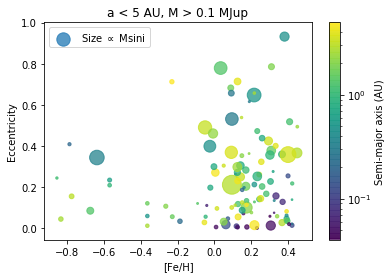

In [52]:
fig, ax = plt.subplots()
plt.title('a < 5 AU, M > 0.1 MJup')
im = ax.scatter(good_spec_filter.fe, good_spec_filter.e, s=list(20*good_spec_filter.mass), 
                c=good_spec_filter.axis, norm=matplotlib.colors.LogNorm(), alpha=0.75, label=r'Size $\propto$ Msini')
ax.set_xlabel('[Fe/H]')
ax.set_ylabel('Eccentricity')
#ax.set_xlim([-0.3, 0.5])
ax.legend(loc=0)
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('Semi-major axis (AU)')#, rotation=270)
fig.savefig('planet_candidates/fe_eccentricity_m05.pdf')

## Look at low-metallicity host stars.

In [27]:
good_spec_filter.query('fe < -0.1')[['hostname', 'per', 'mass', 'iso_mass', 
                                     'teff_emp', 'fe', 'fe_emp', 'e']]

,hostname,per,mass,iso_mass,teff_emp,fe,fe_emp,e
0,37124,154.222416,0.639256,0.780924,5570.5,-0.364363,-0.585,0.053035
1,37124,887.735354,0.661283,0.780924,5570.5,-0.364363,-0.585,0.133024
2,37124,1770.215790,0.656352,0.780924,5570.5,-0.364363,-0.585,0.044078
5,4208,833.578380,0.782832,0.842869,5611.5,-0.225524,-0.375,0.042038
64,114729,1134.433993,0.858416,0.894370,5713.0,-0.264187,-0.325,0.116157
103,216520,4480.581347,0.172599,0.777563,5078.0,-0.124592,-0.170,0.475563
111,114762,83.920007,10.631038,0.781896,6010.0,-0.638020,-0.490,0.342160
121,143761,39.849710,1.048747,0.899128,5666.0,-0.187012,-0.300,0.035336
122,143761,102.560374,0.082599,0.899128,5666.0,-0.187012,-0.300,0.090903
127,155358,194.670445,0.877505,0.800412,5979.0,-0.570417,-0.490,0.235477


## Overplot total sample histogram in metallicity, and eccentricity/metallicity scatterplot for planets.

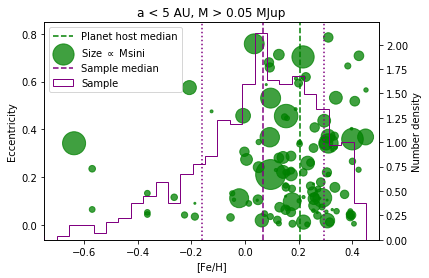

In [28]:
fig, ax = plt.subplots()
#plt.title('Eccentricity vs. Metallicity ([Fe/H] > -0.6)')
plt.title('a < 5 AU, M > 0.05 MJup')
ln1 = ax.scatter(good_spec_filter.fe, good_spec_filter.e, s=list(50*good_spec_filter.mass), 
                alpha=0.75, c='g', label=r'Size $\propto$ Msini')

#Accurately calculate median for planet hosts, don't duplicate metallicity for each planet.
unique_fe = np.unique(good_spec_filter.fe)
median_fe = np.median(unique_fe)
#mad_fe = astrostats.median_absolute_deviation(unique_fe)
mad_fe = astrostats.mad_std(unique_fe)

ln2 = ax.axvline(x=median_fe, c='green', ls='--', label='Planet host median')
#ax.axvline(x=median_fe+mad_fe, c='purple', ls='--')
#ax.axvline(x=median_fe-mad_fe, c='purple', ls='--')
ax.set_xlabel('[Fe/H]')
ax.set_ylabel('Eccentricity')
ax.set_xlim([-0.75, 0.5])

ax2 = ax.twinx()
ln3 = ax2.hist(specmatch.fe, bins=50, histtype='step', color='purple', density=True, label='Sample')
median_sample_fe = np.median(specmatch.fe)
#mad_sample_fe = astrostats.median_absolute_deviation(specmatch.fe)
mad_sample_fe = astrostats.mad_std(specmatch.fe)
ln4 = ax2.axvline(x=median_sample_fe, c='purple', ls='--', label='Sample median')
ax.axvline(x=median_sample_fe+mad_sample_fe, c='purple', ls=':')
ax.axvline(x=median_sample_fe-mad_sample_fe, c='purple', ls=':')
ax2.set_ylabel('Number density')
#ax2.set_xlim([-0.75, 0.5])

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

fig.savefig('planet_candidates/fe_eccentricity_hist.pdf')

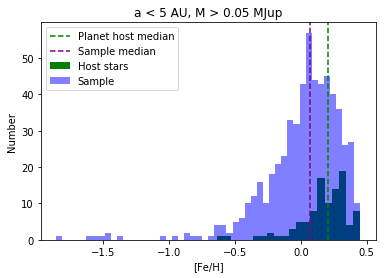

In [29]:
fig, ax = plt.subplots()
plt.title('a < 5 AU, M > 0.05 MJup')
#ln1 = ax.scatter(good_spec_filter.fe, good_spec_filter.e, s=list(50*good_spec_filter.mass), 
#                alpha=0.75, c='g', label=r'Size $\propto$ Msini')

# Accurately calculate median for planet hosts, don't duplicate metallicity for each planet.
unique_fe = np.unique(good_spec_filter.fe)
median_fe = np.median(unique_fe)
#mad_fe = astrostats.median_absolute_deviation(unique_fe)
mad_fe = astrostats.mad_std(unique_fe)

ln1 = ax.hist(unique_fe, bins=20, histtype='stepfilled', color='green', 
              alpha=1, density=False, label='Host stars')
ln2 = ax.axvline(x=median_fe, c='green', ls='--', label='Planet host median')
#ax.axvline(x=median_fe+mad_fe, c='purple', ls='--')
#ax.axvline(x=median_fe-mad_fe, c='purple', ls='--')
ax.set_xlabel('[Fe/H]')
ax.set_ylabel('Number')
#ax.set_xlim([-0.75, 0.5])

#ax2 = ax.twinx()
ln3 = ax.hist(specmatch.fe, bins=50, histtype='stepfilled', color='blue', 
               alpha=0.5, density=False, label='Sample')
median_sample_fe = np.median(specmatch.fe)
#mad_sample_fe = astrostats.median_absolute_deviation(specmatch.fe)
mad_sample_fe = astrostats.mad_std(specmatch.fe)
ln4 = ax.axvline(x=median_sample_fe, c='purple', ls='--', label='Sample median')
#ax.axvline(x=median_sample_fe+mad_sample_fe, c='purple', ls=':')
#ax.axvline(x=median_sample_fe-mad_sample_fe, c='purple', ls=':')
#ax2.set_ylabel('Number density')
#ax2.set_xlim([-0.75, 0.5])

lines, labels = ax.get_legend_handles_labels()
#lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend()
#ax.legend(lines + lines2, labels + labels2, loc=0)

fig.savefig('planet_candidates/fe_two_hist_num.pdf')

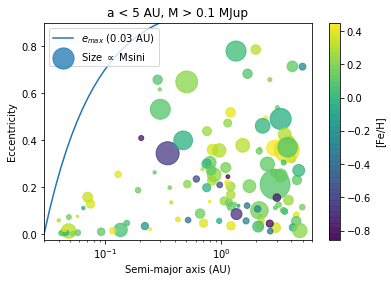

In [54]:
# Overplot peri-distance limit 0.03 AU.
axes = np.logspace(np.log10(0.03), np.log10(6))
e_max = 1 - 0.03/axes

fig, ax = plt.subplots()
plt.title('a < 5 AU, M > 0.1 MJup')
im = ax.scatter(good_spec_filter.axis, good_spec_filter.e, s=list(50*good_spec_filter.mass), 
                c=good_spec_filter.fe, alpha=0.75, label=r'Size $\propto$ Msini')
ax.plot(axes, e_max, label=r'$e_{max}$ (0.03 AU)')
ax.set_xlabel('Semi-major axis (AU)')
ax.set_ylabel('Eccentricity')
ax.set_xlim([0.03,6])
ax.set_ylim([-0.025,0.9])
ax.set_xscale('log')
ax.legend(loc=2)
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('[Fe/H]')#, rotation=270)
fig.savefig('planet_candidates/axis_eccentricity_log_lim.pdf')

## Make a bunch of histograms.

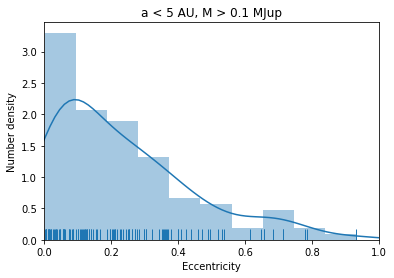

In [55]:
ax = sns.distplot(good_spec_filter.e, bins=10, rug=True)
ax.set(xlabel='Eccentricity', ylabel='Number density')
ax.set_title('a < 5 AU, M > 0.1 MJup')
ax.set_xlim([0,1])
fig = ax.get_figure()
fig.savefig('planet_candidates/eccentricity_histogram_05.pdf')

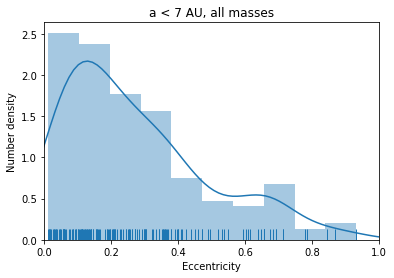

In [59]:
good_spec_all_mass = m_good_spec.query('axis < 7 and axis > 0.1')

ax = sns.distplot(good_spec_all_mass.e, bins=10, rug=True)
#ax.barplot()
ax.set(xlabel='Eccentricity', ylabel='Number density')
ax.set_title('a < 7 AU, all masses')
ax.set_xlim([0,1])
fig = ax.get_figure()
fig.savefig('planet_candidates/eccentricity_histogram_all_masses.pdf')

## Fit Beta distribution to eccentricities. Define a likelihood function for the Beta distribution.

In [64]:
def negbetalike(theta, x, y, yerr):
    a, b = theta
    beta = spec.gamma(a+b)/(spec.gamma(a)*spec.gamma(b)) * x**(a-1) * (1-x)**(b-1)
    return 0.5*(np.sum((y-beta)**2*yerr**-2 + np.log(yerr**2)))

def fit_beta(x, y, a_init=0.867, b_init=3.03): # Kipping estimates
    fit = op.minimize(negbetalike, [a_init, b_init], args=(x, y, yerr))
    return fit['x']

In [ ]:
negbetalike()

ValueError: cannot convert float NaN to integer

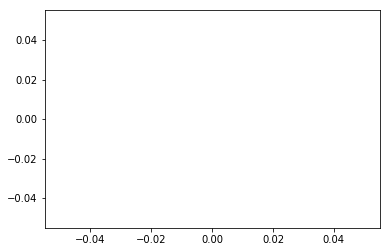

In [34]:
ax = sns.distplot(np.log10(mass), rug=True)
ax.set(xlabel='log10(Msini/MJup)', ylabel='Number density')
ax.set_title('Including new candidates')
fig = ax.get_figure()
fig.savefig('planet_candidates/new_histogram.pdf')

In [ ]:
axold = sns.distplot(np.log10(mold), rug=True)
axold.set(xlabel='log10(Msini/MJup)', ylabel='Number density')
axold.set_title('Known planets')
fig = axold.get_figure()
fig.savefig('planet_candidates/known_histogram.pdf')

In [ ]:
masses_close = masses_good.loc[masses_good.a < 1]
masses_mid   = masses_good.loc[np.logical_and(masses_good.a >= 1, masses_good.a <= 3)]
masses_far   = masses_good.loc[masses_good.a > 3]

In [ ]:
mclose = masses_close.mass
thresh_close = np.log10(0.075) #50% completeness threshold

axclose = sns.distplot(np.log10(mclose), rug=True)
axclose.axvline(thresh_close, c='g', label='Bryan 16 50% completeness')
axclose.set(xlabel='log10(Msini/MJup)', ylabel='Number density')
axclose.set_title('a < 1 AU')
axclose.legend()

figclose = axclose.get_figure()
figclose.savefig('planet_candidates/close_histogram.pdf')

In [ ]:
mmid = masses_mid.mass
thresh_mid = np.log10(0.15) #50% completeness threshold

axmid = sns.distplot(np.log10(mmid), rug=True)
axmid.axvline(thresh_mid, c='g', label='Bryan 16 50% completeness')
axmid.set(xlabel='log10(Msini/MJup)', ylabel='Number density')
axmid.set_title('1 AU < a < 3 AU')
axmid.legend()

figmid = axmid.get_figure()
figmid.savefig('planet_candidates/middle_histogram.pdf')

In [ ]:
mfar = masses_far.mass
thresh_far = np.log10(1.2) #50% completeness threshold

axfar = sns.distplot(np.log10(mfar), rug=True)
axfar.axvline(thresh_far, c='g', label='Bryan 16 50% completeness')
axfar.set(xlabel='log10(Msini/MJup)', ylabel='Number density')
axfar.set_title('a > 3 AU')
axfar.legend()

figfar = axfar.get_figure()
figfar.savefig('planet_candidates/far_histogram.pdf')

## Make distributions of periods and period ratios.

In [ ]:
# Only use ratios below 20.
axper = sns.distplot(np.log10(masses_good.per), rug=True)
axper.set(xlabel='log10(P / 10 days)', ylabel='Number density')
axper.set_title('Including new candidates')

figper = axper.get_figure()
figper.savefig('planet_candidates/period_histogram.pdf')

In [ ]:
# Only use ratios below 20.
axper = sns.distplot(np.log10(masses_old.per), rug=True)
axper.set(xlabel='log10(P / 10 days)', ylabel='Number density')
axper.set_title('Known planets')

figper = axper.get_figure()
figper.savefig('planet_candidates/period_histogram_old.pdf')

In [ ]:
def period_ratios(pers):
    ratios = []
    nplanets = len(pers)
    sorted = np.sort(pers)
    for i in np.arange(nplanets):
        for j in np.arange(i):
            ratios.append(sorted[i]/sorted[j])
    return ratios

In [ ]:
systems = masses_good.hostname.unique()

In [ ]:
all_ratios = []
for system in systems:
    sys_db = masses_good.loc[masses_good.hostname == system]
    if len(sys_db) > 1:
        sys_ratios = period_ratios(sys_db.per)
        all_ratios.append(sys_ratios)
all_ratios = np.concatenate(all_ratios)

In [ ]:
# Only use ratios below 20.
filtered_ratios = np.extract(all_ratios < 20, all_ratios)
axper = sns.distplot(filtered_ratios, rug=True)
axper.set_xlim([0,25])
axper.set(xlabel='Period ratio', ylabel='Number density')
axper.set_title('System period ratios (< 20)')

figper = axper.get_figure()
figper.savefig('planet_candidates/period_ratio_histogram.pdf')

## Plot known legacy planets.

In [ ]:
fig, ax = plt.subplots()
plt.title('Recovered, known legacy planets')
ax.scatter(aold, mold, c='b', alpha=0.75)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Semi-major axis (AU)')
ax.set_ylabel(r'Msini ($M_{Jup}$)')
fig.savefig('planet_candidates/mass_axis_known.pdf')

## Catalogue trend systems.

In [ ]:
trends = masses_only.loc[masses_only.per > 5*10**3]
len(trends)